# Chapter 6 - Linear Model Selection and Regularization

In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn import cross_validation
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')

# Lab

### § 6.6.1 Ridge Regression 

In [3]:
# In R, I exported the dataset from package 'ISLR' to a csv file.
df = pd.read_csv('Data/Hitters.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
Unnamed: 0    263 non-null object
AtBat         263 non-null int64
Hits          263 non-null int64
HmRun         263 non-null int64
Runs          263 non-null int64
RBI           263 non-null int64
Walks         263 non-null int64
Years         263 non-null int64
CAtBat        263 non-null int64
CHits         263 non-null int64
CHmRun        263 non-null int64
CRuns         263 non-null int64
CRBI          263 non-null int64
CWalks        263 non-null int64
League        263 non-null object
Division      263 non-null object
PutOuts       263 non-null int64
Assists       263 non-null int64
Errors        263 non-null int64
Salary        263 non-null float64
NewLeague     263 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 41.1+ KB


In [5]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 6 columns):
League_A       263 non-null float64
League_N       263 non-null float64
Division_E     263 non-null float64
Division_W     263 non-null float64
NewLeague_A    263 non-null float64
NewLeague_N    263 non-null float64
dtypes: float64(6)
memory usage: 14.4 KB


In [357]:
y = df.Salary

# Drop the column with names, the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Unnamed: 0', 'Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
# Define the feature set X
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test , y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5, random_state=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 19 columns):
AtBat          263 non-null float64
Hits           263 non-null float64
HmRun          263 non-null float64
Runs           263 non-null float64
RBI            263 non-null float64
Walks          263 non-null float64
Years          263 non-null float64
CAtBat         263 non-null float64
CHits          263 non-null float64
CHmRun         263 non-null float64
CRuns          263 non-null float64
CRBI           263 non-null float64
CWalks         263 non-null float64
PutOuts        263 non-null float64
Assists        263 non-null float64
Errors         263 non-null float64
League_N       263 non-null float64
Division_W     263 non-null float64
NewLeague_N    263 non-null float64
dtypes: float64(19)
memory usage: 41.1 KB


For the __glmnet()__ function in R the penalty is defined as:
### $$ \lambda\bigg(\frac{1}{2}(1−\alpha)|\beta|^2_2 \ +\ \alpha|\beta|_1\bigg) $$
(See R documentation and http://core.ac.uk/download/pdf/6287975.pdf)<BR>
The function supports L1 and L2 regularization. For just Ridge regression we need to use $\alpha = 0 $. This reduces the above penalty to
### $$ \frac{1}{2}\lambda |\beta|^2_2 $$
The sklearn __Ridge()__ function has the standard L2 penalty:
### $$ \lambda |\beta|^2_2 $$

This means that for a given L2 penalty in glmnet(), we need to use half the lambda in Ridge().

In [143]:
regr = Ridge(alpha=(0.5*11498))
regr.fit(scale(X, with_mean=True, with_std=False), y)
print(regr.get_params)
print(regr.intercept_)
print(pd.Series(regr.coef_, index=X.columns))

<bound method Ridge.get_params of Ridge(alpha=5749.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)>
535.925882129
AtBat         -1.737541
Hits           5.627359
HmRun          0.007559
Runs          -0.073590
RBI            0.544605
Walks          4.792407
Years         -0.126203
CAtBat        -0.240853
CHits          0.416139
CHmRun         0.144927
CRuns          1.284517
CRBI           0.661134
CWalks        -0.612224
PutOuts        0.294636
Assists        0.343332
Errors        -1.677869
League_N       0.478324
Division_W    -1.257765
NewLeague_N    0.346896
dtype: float64


For some reason I do not get the same results as in R. 

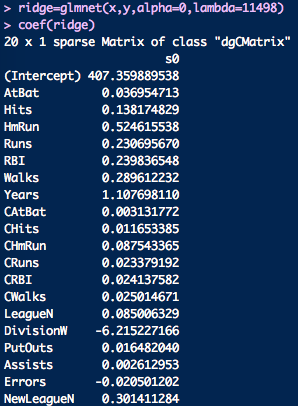

In [144]:
Image('Data/R_glmnet.png')

When adding the argument $normalisation = FALSE$ to the glmnet() call in R, the results are about the same. I wonder why.

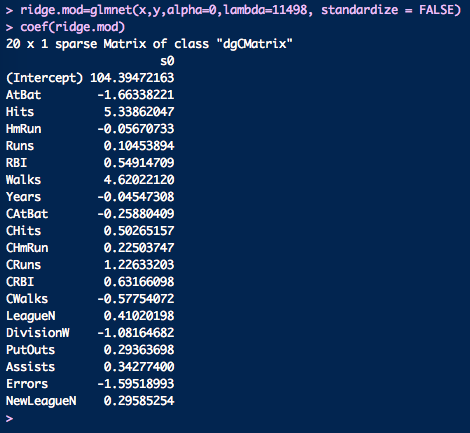

In [145]:
Image('Data/R_glmnet2.png')

### § 6.6.2 The Lasso

The sklearn __Lasso()__ function has the standard L1 penalty:
### $$ \lambda |\beta|_1 $$

In [208]:
grid = 10**np.linspace(10, -2, 100)

In [147]:
regr2 = LassoCV(max_iter=10000, alphas=None, cv=10)
regr2.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [148]:
regr2.alpha_

973.23329001746504

In [149]:
pred2 = regr2.predict(X_test)
mean_squared_error(y_test, pred2)

107002.39978782112

In [150]:
pd.Series(regr2.coef_, index=X.columns)

AtBat          0.000000
Hits           0.000000
HmRun         -0.000000
Runs           0.000000
RBI            0.000000
Walks          0.136693
Years         -0.000000
CAtBat        -0.482745
CHits          0.995668
CHmRun         0.000000
CRuns          1.742982
CRBI           0.492946
CWalks         0.000000
PutOuts        0.211351
Assists        0.372707
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

### § 6.7.1 Principal Components Regression

Scikit-klearn does not have an implementation of PCA and regression combined. The regression I do below is probably different from the one implemented in the 'pls' package in R.

In [319]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

print(pca.components_.shape)
pd.DataFrame(pca.components_.T).loc[:4,:5]

(19, 19)


          0         1         2         3         4         5
0  0.198290  0.383784 -0.088626  0.031967 -0.028117  0.070646
1  0.195861  0.377271 -0.074032  0.017982  0.004652  0.082240
2  0.204369  0.237136  0.216186 -0.235831 -0.077660  0.149646
3  0.198337  0.377721  0.017166 -0.049942  0.038536  0.136660
4  0.235174  0.314531  0.073085 -0.138985 -0.024299  0.111675

The above loadings are the same as in R.

In [320]:
print(X_reduced.shape)
pd.DataFrame(X_reduced.T).loc[:4,:5]

(263, 19)


          0         1         2         3         4         5
0 -0.009649  0.411434  3.466822 -2.558317  1.027702 -3.980657
1 -1.870522  2.429422 -0.825947  0.230984  1.573537 -1.507279
2 -1.265145  0.909193 -0.555469 -0.519642 -1.331382  0.155479
3 -0.935481 -0.264212 -1.616726 -2.176251  3.494004  0.369840
4 -1.109636 -1.232031  0.857488  0.820301 -0.983427  1.209334

The above principal components are the same as in R.

In [321]:
# Variance explained by the principal components
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 38.31,  60.15,  70.84,  79.03,  84.29,  88.63,  92.26,  94.96,
        96.28,  97.25,  97.97,  98.64,  99.14,  99.46,  99.73,  99.88,
        99.95,  99.98,  99.99])

(-1, 20.0)

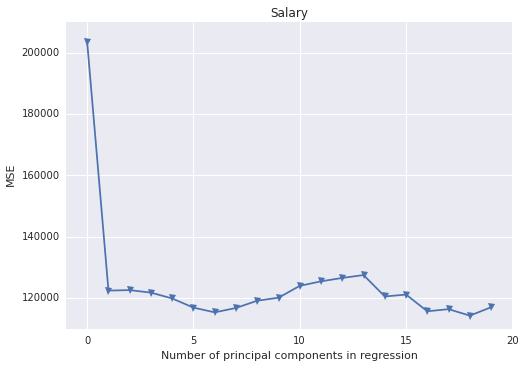

In [325]:
# 10-fold CV, with shuffle
kf_10 = cross_validation.KFold(len(X_reduced), n_folds=10, shuffle=True, random_state=1)
n = len(X_reduced)

regr = LinearRegression()
mse = []

# Do one CV for just the intercept (no principal components in regression)
score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='mean_squared_error').mean()    
mse.append(score)

# Do CV for the 19 principle components
for i in np.arange(1, 20):
    score = cross_validation.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(-score)
    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

The above plot indicates that the lowest training MSE is reached when doing regression on 18 components.

#### Fitting PCA with training data

(-1, 20.0)

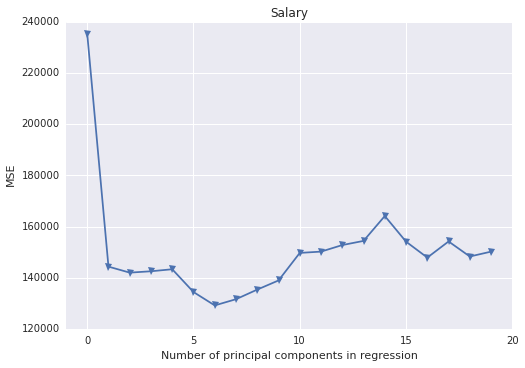

In [345]:
pca2 = PCA()
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = cross_validation.KFold(n, n_folds=10, random_state=1)

mse = []

# Do one CV for just the intercept (no principal components in regression)
score = cross_validation.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='mean_squared_error').mean()    
mse.append(-score)

# Do CV for the 19 principle components
for i in np.arange(1, 20):
    score = cross_validation.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

The above plot indicates that the lowest training MSE is reached when doing regression on 6 components.

#### Transform test data with PCA loadings and fit regression on 6 principal components

In [327]:
X_reduced_test = pca2.transform(scale(X_test))[:,:7]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

111994.4227363699

### § 6.7.2 Partial Least Squares

(-1, 20.0)

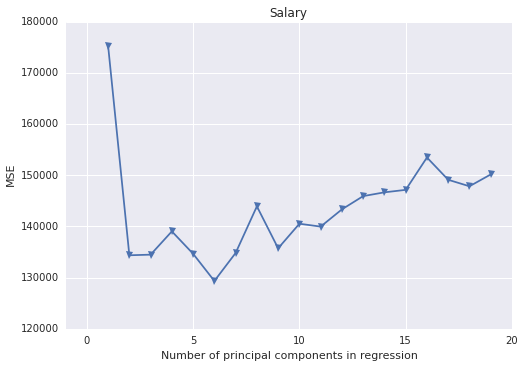

In [369]:
mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i, scale=False)
    pls.fit(scale(X_train),y_train)
    #X_ = pls.transform(X_train)
    score = cross_validation.cross_val_score(pls, X_train, y_train, cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)